In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
import scipy.stats.stats as stats
from sklearn.metrics import mean_squared_error

In [2]:
from tensorflow.keras.models import Sequential

In [29]:
from sklearn.metrics import r2_score

In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [7]:
df = pd.read_csv('track_features_final.csv', index_col=0)

In [8]:
meta = pd.read_csv('meta_final.csv', index_col = 0)
meta.rename(columns={'Track ID': 'track_id'}, inplace=True)
tracks = df.merge(meta, on='track_id', how='left')

In [9]:
tracks

,track_id,title,artist,genre,acousticness,danceability,energy,instrumentalness,liveness,speechiness,...,mfccs_mean15,mfccs_var15,mfccs_mean16,mfccs_var16,mfccs_mean17,mfccs_var17,mfccs_mean18,mfccs_var18,mfccs_mean19,mfccs_var19
0,2,Food,AWOL,Hip-Hop,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,...,1.253358,49.994880,-8.481487,53.345783,-2.040749,52.196274,-2.946624,51.777920,0.094077,40.441700
1,5,This World,AWOL,Hip-Hop,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,...,0.919858,66.263405,-4.126342,44.906055,-0.580666,44.026913,-1.600445,65.263400,1.350323,64.534930
2,10,Freeway,Kurt Vile,Pop,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,...,-0.911099,42.735588,-3.207996,32.780640,3.043154,40.873420,-1.036512,30.224850,3.882601,29.444992
3,140,Queen Of The Wires,Alec K. Redfearn & the Eyesores,Folk,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,...,1.239001,43.232227,-5.205992,38.285038,-0.754437,39.603607,-6.319377,47.348240,-1.172379,44.371730
4,141,Ohio,Alec K. Redfearn & the Eyesores,Folk,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,...,5.053833,99.240820,-0.170090,91.179344,3.087437,62.452350,-8.665928,70.666970,-1.098168,89.260025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3279,154306,Yummy,Fleslit,Hip-Hop,0.008100,0.707000,0.354000,0.903000,0.109000,0.040600,...,5.531777,60.408886,0.578954,34.085102,6.731422,32.125755,3.618689,43.405476,9.467090,79.778854
3280,154307,12:01 AM,Fleslit,Hip-Hop,0.059100,0.844000,0.346000,0.826000,0.054200,0.076500,...,-0.953383,97.223320,-5.637122,50.896816,6.983463,95.540886,2.458356,151.581600,2.188587,110.020600
3281,154308,Devil Of Miami,Fleslit,Hip-Hop,0.005560,0.574000,0.417000,0.768000,0.363000,0.044400,...,3.838140,90.520256,4.203661,88.265230,2.577975,108.629930,1.229812,69.142490,-3.231690,65.682460
3282,154309,A1 Symphony,Fleslit,Hip-Hop,0.411000,0.706000,0.654000,0.851000,0.053900,0.514000,...,-7.702279,40.592216,-10.535363,65.548470,1.828215,104.435350,7.517279,172.511520,8.652144,166.639270


In [10]:
tracks.dropna(inplace=True)

In [11]:
cols = ['zero_crossings', 'tempo_y', 'spec_cent_mean',
       'spec_cent_var', 'spectral_rolloff_mean', 'spectral_rolloff_var',
       'chroma_mean0', 'chroma_var0', 'chroma_mean1', 'chroma_var1',
       'chroma_mean2', 'chroma_var2', 'chroma_mean3', 'chroma_var3',
       'chroma_mean4', 'chroma_var4', 'chroma_mean5', 'chroma_var5',
       'chroma_mean6', 'chroma_var6', 'chroma_mean7', 'chroma_var7',
       'chroma_mean8', 'chroma_var8', 'chroma_mean9', 'chroma_var9',
       'chroma_mean10', 'chroma_var10', 'chroma_mean11', 'chroma_var11',
       'harm_mean', 'perc_mean', 'harm_var', 'perc_var', 'mfccs_mean0',
       'mfccs_var0', 'mfccs_mean1', 'mfccs_var1', 'mfccs_mean2', 'mfccs_var2',
       'mfccs_mean3', 'mfccs_var3', 'mfccs_mean4', 'mfccs_var4', 'mfccs_mean5',
       'mfccs_var5', 'mfccs_mean6', 'mfccs_var6', 'mfccs_mean7', 'mfccs_var7',
       'mfccs_mean8', 'mfccs_var8', 'mfccs_mean9', 'mfccs_var9',
       'mfccs_mean10', 'mfccs_var10', 'mfccs_mean11', 'mfccs_var11',
       'mfccs_mean12', 'mfccs_var12', 'mfccs_mean13', 'mfccs_var13',
       'mfccs_mean14', 'mfccs_var14', 'mfccs_mean15', 'mfccs_var15',
       'mfccs_mean16', 'mfccs_var16', 'mfccs_mean17', 'mfccs_var17',
       'mfccs_mean18', 'mfccs_var18', 'mfccs_mean19', 'mfccs_var19']

In [135]:
tracks.iloc[:5, 4:12]

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo_x,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
2,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
3,0.376312,0.734079,0.265685,0.669581,0.085995,0.039068,107.952,0.609991
4,0.963657,0.435933,0.075632,0.345493,0.105686,0.026658,33.477,0.163950


# Accounsticness

In [14]:
# Load the train and test data
X = tracks[cols]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = tracks['acousticness']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
tf.keras.backend.clear_session()

In [16]:
model = Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)), #kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38400     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [17]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
loss = tf.keras.losses.Huber()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics='mse')

In [19]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, batch_size=256)#, callbacks=[callback])

Epoch 1/600
11/11 [==============================] - 1s 50ms/step - loss: 0.1052 - mse: 0.2105 - val_loss: 0.0756 - val_mse: 0.1512
Epoch 2/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1015 - mse: 0.2030 - val_loss: 0.0743 - val_mse: 0.1486
Epoch 3/600
11/11 [==============================] - 0s 16ms/step - loss: 0.0964 - mse: 0.1927 - val_loss: 0.0727 - val_mse: 0.1455
Epoch 4/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0956 - mse: 0.1911 - val_loss: 0.0711 - val_mse: 0.1421
Epoch 5/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0892 - mse: 0.1783 - val_loss: 0.0694 - val_mse: 0.1389
Epoch 6/600
11/11 [==============================] - 0s 16ms/step - loss: 0.0860 - mse: 0.1720 - val_loss: 0.0679 - val_mse: 0.1357
Epoch 7/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0847 - mse: 0.1693 - val_loss: 0.0662 - val_mse: 0.1325
Epoch 8/600
11/11 [==============================] - 0s 14ms/step - loss: 0.

In [20]:
pred = model.predict(X_test)

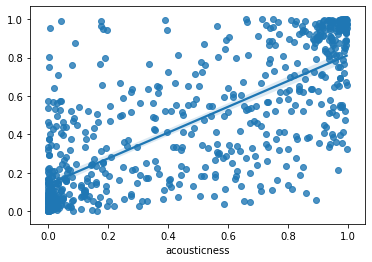

In [21]:
sns.regplot(x=y_test, y=pred)

In [31]:
r2_score(y_train, model.predict(X_train))

0.8125171632227683

In [32]:
r2_score(y_test, model.predict(X_test))

0.5392129898260458

# Danceability

In [44]:
# Load the train and test data
X = tracks[cols]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = tracks['danceability']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# clear the previous tensorflow session
tf.keras.backend.clear_session()

In [57]:
model = Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)), #kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Dense(1, activation='sigmoid'),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38400     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [58]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [59]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
loss = tf.keras.losses.Huber()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics='mse')

In [60]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, batch_size=256)

Epoch 1/600
11/11 [==============================] - 1s 47ms/step - loss: 0.0587 - mse: 0.1173 - val_loss: 0.0179 - val_mse: 0.0358
Epoch 2/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0569 - mse: 0.1139 - val_loss: 0.0183 - val_mse: 0.0367
Epoch 3/600
11/11 [==============================] - 0s 17ms/step - loss: 0.0549 - mse: 0.1099 - val_loss: 0.0191 - val_mse: 0.0381
Epoch 4/600
11/11 [==============================] - 0s 13ms/step - loss: 0.0521 - mse: 0.1042 - val_loss: 0.0197 - val_mse: 0.0394
Epoch 5/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0512 - mse: 0.1024 - val_loss: 0.0203 - val_mse: 0.0407
Epoch 6/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0510 - mse: 0.1020 - val_loss: 0.0209 - val_mse: 0.0419
Epoch 7/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0507 - mse: 0.1013 - val_loss: 0.0214 - val_mse: 0.0428
Epoch 8/600
11/11 [==============================] - 0s 15ms/step - loss: 0.

In [61]:
pred = model.predict(X_test)

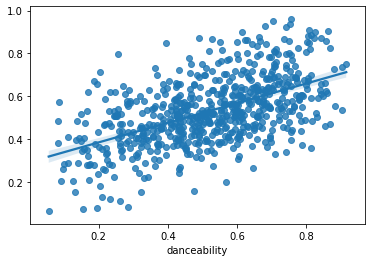

In [62]:
sns.regplot(x=y_test, y=pred)

In [63]:
r2_score(y_train, model.predict(X_train))

0.6177478957476079

In [64]:
r2_score(y_test, model.predict(X_test))

0.19752072318438907

# Energy

In [75]:
# Load the train and test data
X = tracks[cols]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = tracks['energy']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
# clear the previous tensorflow session
tf.keras.backend.clear_session()

In [86]:
model = Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)), #kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38400     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [87]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [88]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
loss = tf.keras.losses.Huber()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics='mse')

In [89]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, batch_size=256)#, callbacks=[callback])

Epoch 1/600
11/11 [==============================] - 0s 45ms/step - loss: 0.0630 - mse: 0.1259 - val_loss: 0.0331 - val_mse: 0.0663
Epoch 2/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0599 - mse: 0.1198 - val_loss: 0.0322 - val_mse: 0.0643
Epoch 3/600
11/11 [==============================] - 0s 17ms/step - loss: 0.0608 - mse: 0.1216 - val_loss: 0.0317 - val_mse: 0.0634
Epoch 4/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0586 - mse: 0.1171 - val_loss: 0.0313 - val_mse: 0.0626
Epoch 5/600
11/11 [==============================] - ETA: 0s - loss: 0.0551 - mse: 0.110 - 0s 14ms/step - loss: 0.0554 - mse: 0.1108 - val_loss: 0.0307 - val_mse: 0.0614
Epoch 6/600
11/11 [==============================] - 0s 17ms/step - loss: 0.0523 - mse: 0.1047 - val_loss: 0.0301 - val_mse: 0.0601
Epoch 7/600
11/11 [==============================] - 0s 16ms/step - loss: 0.0554 - mse: 0.1109 - val_loss: 0.0294 - val_mse: 0.0587
Epoch 8/600
11/11 [===================

In [90]:
pred = model.predict(X_test)

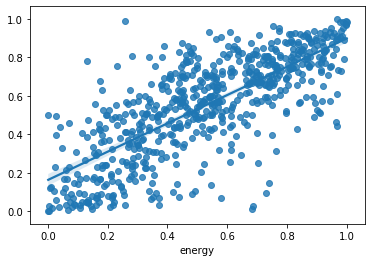

In [91]:
sns.regplot(x=y_test, y=pred)

In [92]:
r2_score(y_train, model.predict(X_train))

0.7613902477694414

In [93]:
r2_score(y_test, model.predict(X_test))

0.49423705484365366

# Instrumentalness

In [94]:
# Load the train and test data
X = tracks[cols]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = tracks['instrumentalness']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# clear the previous tensorflow session
tf.keras.backend.clear_session()

In [96]:
model = Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)), #kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38400     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [97]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [98]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
loss = tf.keras.losses.Huber()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics='mse')

In [99]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, batch_size=256)#, callbacks=[callback])

Epoch 1/600
11/11 [==============================] - 1s 49ms/step - loss: 0.1176 - mse: 0.2351 - val_loss: 0.0852 - val_mse: 0.1705
Epoch 2/600
11/11 [==============================] - 0s 17ms/step - loss: 0.1183 - mse: 0.2365 - val_loss: 0.0838 - val_mse: 0.1677
Epoch 3/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1105 - mse: 0.2210 - val_loss: 0.0828 - val_mse: 0.1657
Epoch 4/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1125 - mse: 0.2250 - val_loss: 0.0824 - val_mse: 0.1649
Epoch 5/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1096 - mse: 0.2193 - val_loss: 0.0826 - val_mse: 0.1652
Epoch 6/600
11/11 [==============================] - 0s 17ms/step - loss: 0.1055 - mse: 0.2110 - val_loss: 0.0831 - val_mse: 0.1662
Epoch 7/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1077 - mse: 0.2154 - val_loss: 0.0837 - val_mse: 0.1674
Epoch 8/600
11/11 [==============================] - 0s 19ms/step - loss: 0.

In [100]:
pred = model.predict(X_test)

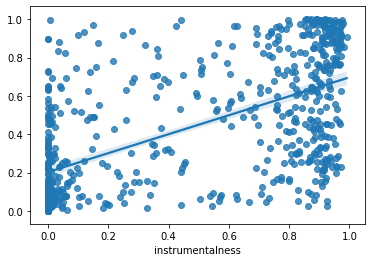

In [101]:
sns.regplot(x=y_test, y=pred)

In [102]:
r2_score(y_train, model.predict(X_train))

0.746638608732251

In [103]:
r2_score(y_test, model.predict(X_test))

0.3028448998811135

# Liveness

In [105]:
# Load the train and test data
X = tracks[cols]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = tracks['liveness']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
# clear the previous tensorflow session
tf.keras.backend.clear_session()

In [107]:
model = Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)), #kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38400     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [108]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [109]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
loss = tf.keras.losses.Huber()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics='mse')

In [110]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, batch_size=256)#, callbacks=[callback])

Epoch 1/600
11/11 [==============================] - 0s 41ms/step - loss: 0.0923 - mse: 0.1846 - val_loss: 0.0738 - val_mse: 0.1476
Epoch 2/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0907 - mse: 0.1813 - val_loss: 0.0707 - val_mse: 0.1413
Epoch 3/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0905 - mse: 0.1810 - val_loss: 0.0696 - val_mse: 0.1392
Epoch 4/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0916 - mse: 0.1832 - val_loss: 0.0700 - val_mse: 0.1400
Epoch 5/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0910 - mse: 0.1820 - val_loss: 0.0709 - val_mse: 0.1417
Epoch 6/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0894 - mse: 0.1788 - val_loss: 0.0720 - val_mse: 0.1440
Epoch 7/600
11/11 [==============================] - 0s 16ms/step - loss: 0.0880 - mse: 0.1760 - val_loss: 0.0731 - val_mse: 0.1463
Epoch 8/600
11/11 [==============================] - 0s 15ms/step - loss: 0.

In [111]:
pred = model.predict(X_test)

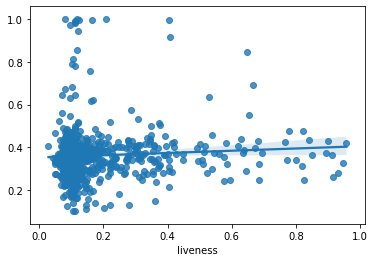

In [112]:
sns.regplot(x=y_test, y=pred)

In [113]:
r2_score(y_train, model.predict(X_train))

-1.02499819513773

In [114]:
r2_score(y_test, model.predict(X_test))

-1.5927939666262083

# Speechiness

In [115]:
# Load the train and test data
X = tracks[cols]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = tracks['speechiness']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
# clear the previous tensorflow session
tf.keras.backend.clear_session()

In [117]:
model = Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)), #kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38400     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [118]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [119]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
loss = tf.keras.losses.Huber()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics='mse')

In [120]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, batch_size=256)#, callbacks=[callback])

Epoch 1/600
11/11 [==============================] - 0s 44ms/step - loss: 0.1276 - mse: 0.2551 - val_loss: 0.0980 - val_mse: 0.1961
Epoch 2/600
11/11 [==============================] - 0s 17ms/step - loss: 0.1262 - mse: 0.2525 - val_loss: 0.0957 - val_mse: 0.1914
Epoch 3/600
11/11 [==============================] - 0s 17ms/step - loss: 0.1248 - mse: 0.2495 - val_loss: 0.0938 - val_mse: 0.1875
Epoch 4/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1255 - mse: 0.2511 - val_loss: 0.0920 - val_mse: 0.1841
Epoch 5/600
11/11 [==============================] - 0s 14ms/step - loss: 0.1231 - mse: 0.2462 - val_loss: 0.0904 - val_mse: 0.1809
Epoch 6/600
11/11 [==============================] - 0s 15ms/step - loss: 0.1234 - mse: 0.2468 - val_loss: 0.0889 - val_mse: 0.1778
Epoch 7/600
11/11 [==============================] - 0s 16ms/step - loss: 0.1239 - mse: 0.2478 - val_loss: 0.0872 - val_mse: 0.1743
Epoch 8/600
11/11 [==============================] - 0s 14ms/step - loss: 0.

In [121]:
pred = model.predict(X_test)

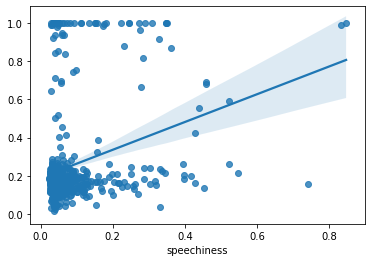

In [122]:
sns.regplot(x=y_test, y=pred)

In [123]:
r2_score(y_train, model.predict(X_train))

-5.190547504904632

In [124]:
r2_score(y_test, model.predict(X_test))

-7.910755248879662

# Valence

In [125]:
# Load the train and test data
X = tracks[cols]
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
y = tracks['valence']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [126]:
# clear the previous tensorflow session
tf.keras.backend.clear_session()

In [127]:
model = Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)), #kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),

    
    tf.keras.layers.Dense(1, activation='sigmoid')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               38400     
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3

In [128]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [129]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
loss = tf.keras.losses.Huber()
model.compile(optimizer=optimizer,
              loss=loss,
              metrics='mse')

In [130]:
model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=600, batch_size=256)#, callbacks=[callback])

Epoch 1/600
11/11 [==============================] - 0s 44ms/step - loss: 0.0826 - mse: 0.1652 - val_loss: 0.0421 - val_mse: 0.0842
Epoch 2/600
11/11 [==============================] - ETA: 0s - loss: 0.0823 - mse: 0.164 - 0s 16ms/step - loss: 0.0817 - mse: 0.1634 - val_loss: 0.0418 - val_mse: 0.0837
Epoch 3/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0803 - mse: 0.1606 - val_loss: 0.0414 - val_mse: 0.0827
Epoch 4/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0799 - mse: 0.1597 - val_loss: 0.0409 - val_mse: 0.0817
Epoch 5/600
11/11 [==============================] - 0s 16ms/step - loss: 0.0754 - mse: 0.1507 - val_loss: 0.0404 - val_mse: 0.0809
Epoch 6/600
11/11 [==============================] - 0s 15ms/step - loss: 0.0751 - mse: 0.1502 - val_loss: 0.0401 - val_mse: 0.0802
Epoch 7/600
11/11 [==============================] - 0s 14ms/step - loss: 0.0788 - mse: 0.1577 - val_loss: 0.0399 - val_mse: 0.0798
Epoch 8/600
11/11 [===================

In [131]:
pred = model.predict(X_test)

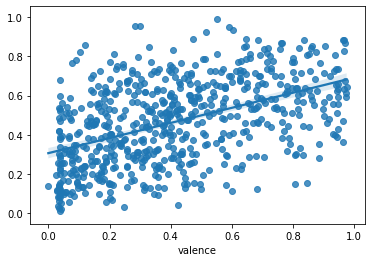

In [132]:
sns.regplot(x=y_test, y=pred)

In [133]:
r2_score(y_train, model.predict(X_train))

0.6563742251701411

In [134]:
r2_score(y_test, model.predict(X_test))

0.0809094293363054